   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

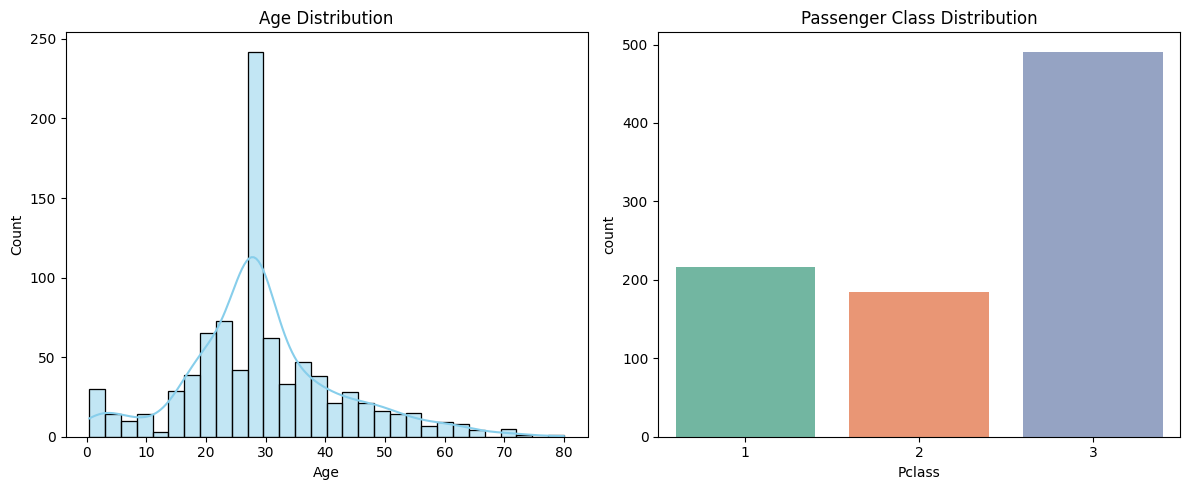

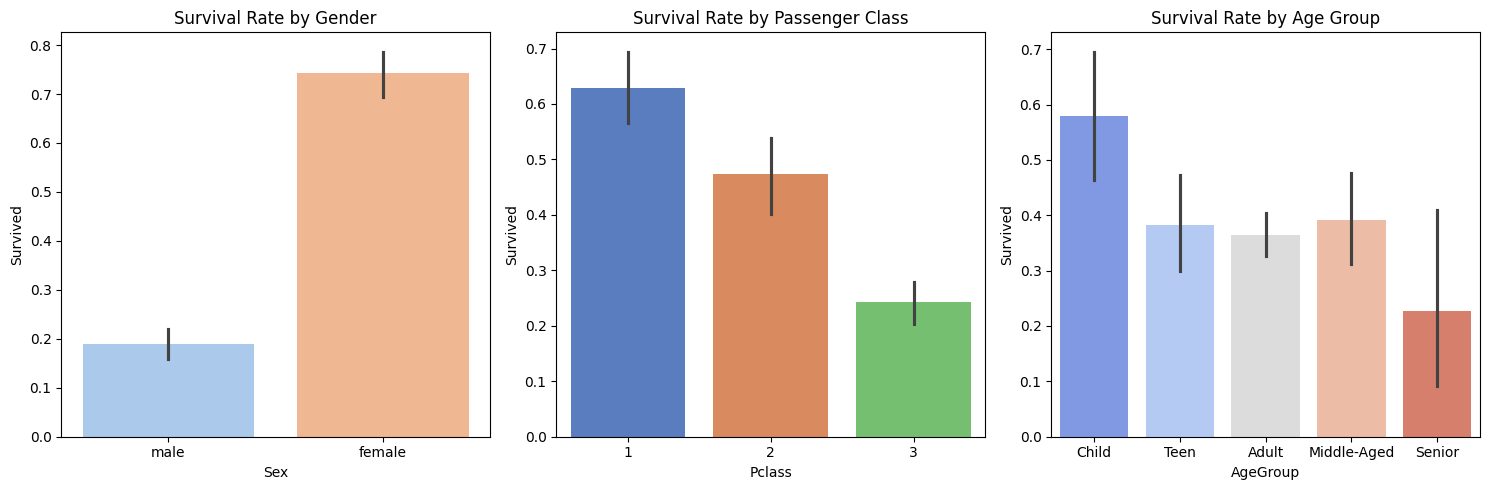

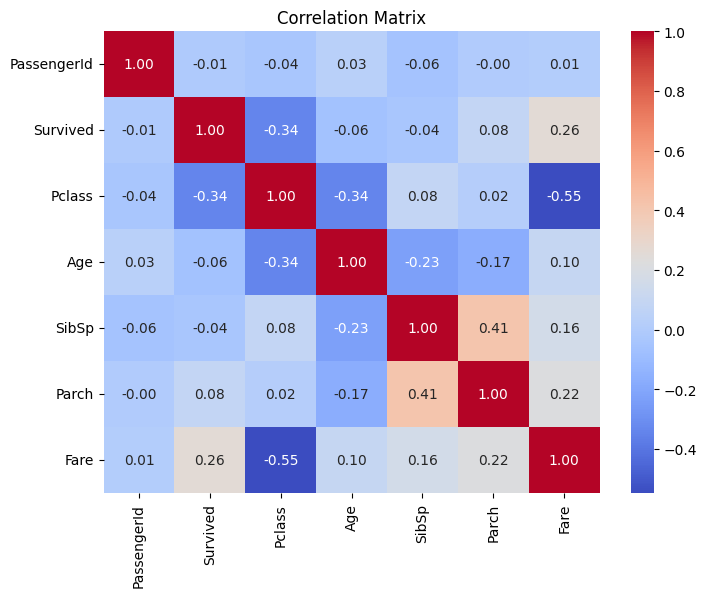

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Inspect data
print(df.head())
print(df.info())
print(df.describe())

# 2. Check missing values
print(df.isnull().sum())

# 3. Handle missing values safely
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])

# 4. Explore key variables distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Pclass', data=df, palette="Set2", legend=False)
plt.title('Passenger Class Distribution')

plt.tight_layout()
plt.show()

# 5. Analyze survival rates by gender, class, age group
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, palette="pastel", legend=False)
plt.title('Survival Rate by Gender')

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette="muted", legend=False)
plt.title('Survival Rate by Passenger Class')

plt.subplot(1, 3, 3)
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 12, 20, 40, 60, 80],
                        labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', hue='AgeGroup', data=df, palette="coolwarm", legend=False)
plt.title('Survival Rate by Age Group')

plt.tight_layout()
plt.show()

# 6. Explore correlations with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
